In [1]:
from network_number_suppliers import *

In [2]:
from scipy.optimize import brentq

def ell_hat(pc, plot=True):
    δ, α, c = pc._δ, pc._α, pc._c
    p = pc.p_func
    n = np.array([i for i in range(2, 50)])
    f = lambda ell: np.amin(n * p(ell/n) + α(ell, n)) - c(ell)
    g = lambda ell: np.amin(n * δ * c(ell/n) + α(ell, n)) - c(ell)
    
    if plot:
        Ell = np.linspace(0, 1, 300)
        G=[]
        F=[]
        for i in Ell:
            G.append(g(i))
            F.append(f(i))
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(Ell, G, alpha=0.4)
        ax.plot(Ell, F, alpha=0.4)
        ax.set_xlabel("$\ell$", fontsize=14)
        ax.set_ylabel("$f(\ell)$", fontsize=14)
        ax.set_xlim(0,1)
    
    try:
        root = brentq(f, a=0.0001, b=1)
        print("ell-hat=", root)
        return root
    except:
        print("no root in (0, 1)")
        
        
def n_star(pc, plot=True,):
    δ, α, c = pc._δ, pc._α, pc._c
    p = pc.p_func
    n = [i for i in range(2, 50)]
    N = np.linspace(2, 50, 5000)
    n = np.array(n, dtype="float")
    n_star = []
    N_star = []
    ell_lower = ell_hat(pc, plot=False)
    Ell = np.linspace(ell_lower, 1, 150)
    for ell in Ell:
        ns = np.argmin(n * p(ell/n) + α(ell, n)) + 2
        Ns = np.argmin(N * p(ell/N) + α(ell, N)) / 5000 * 48 + 2
        n_star.append(ns)
        N_star.append(Ns)
    if plot:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(Ell, n_star)
        ax.plot(Ell, N_star)
        
#         while 1:
#             ax.axvline(x=ell_lower * (i+1), color='g') 
#             ell_lower *= 2
#             if ell_lower > 1:
#                 break
        ax.set_xlabel("$\ell$", fontsize=14)
        ax.set_ylabel("$n^*(\ell)$", fontsize=14)
        ax.set_xlim(0,1)
        
    return n_star

### Price function 
$$p(\ell) = \delta \min \{ \min_{n \geq 2} \{n p(\ell/n) + \alpha(\ell, n)\}, c(\ell \} $$

(4, [5, 3, 3])


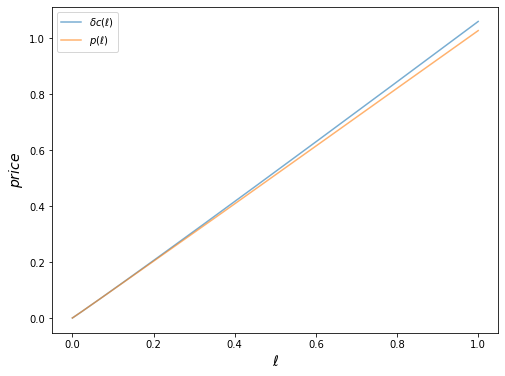

1.0278810721271066


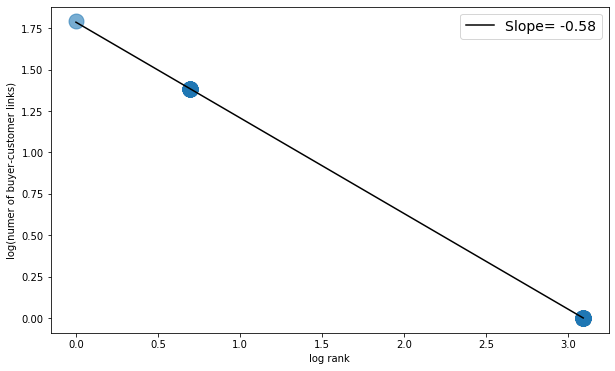

In [20]:
theta = 1/1.0208333333333335
# t = (1 - 0.5 * theta) / (theta * (1 - 0.5))
t = 1.2
pc = Chain_n(τ=0.01, max_n=100,
             α=lambda ell, n: 0.000020*n**(10/3.3),
             c=lambda ell: 1*ell**(1/theta) + 0.05*ell,)

print(pc.level())
pc.plot_prices()
print(pc.p_func(1))
# draw_graph(pc, scale_factor=4000)
zipf_with_regression(pc, plot='link')

### An example that upstream firms have more supliers.

(4, [4, 10, 11])


/home/chien/Dropbox/Research/production_chain/production_network/price_choice_over_n.py:124: RuntimeWarning: divide by zero encountered in log
  plt.plot(self.grid, np.log(self._δ * self._c(self.grid)), plottype, label=cost_label, alpha=0.6)
/home/chien/Dropbox/Research/production_chain/production_network/price_choice_over_n.py:125: RuntimeWarning: divide by zero encountered in log
  plt.plot(self.grid, np.log(self.p), plottype, label=label, alpha=0.6)


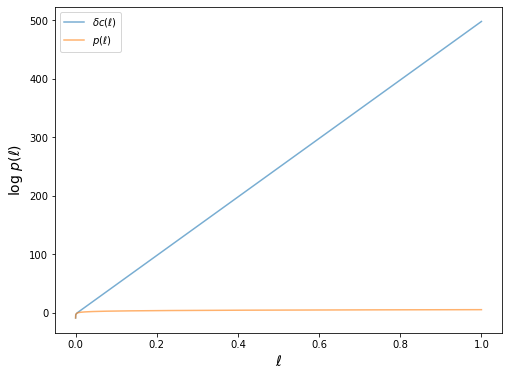

ell-hat= 0.0036089085987001646
ell-hat= 0.0036089085987001646


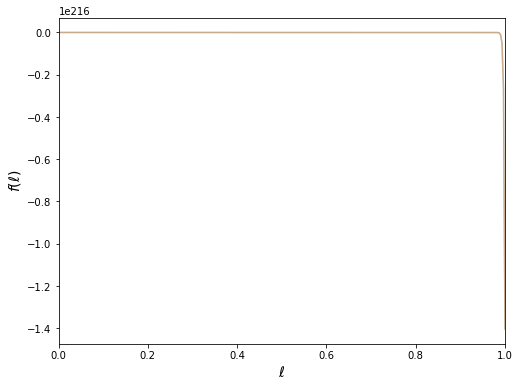

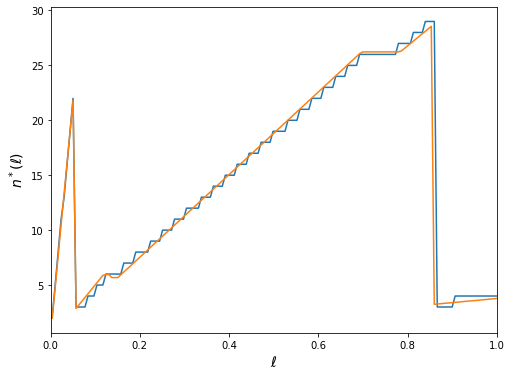

In [14]:
pc = Chain_n(τ=0.001, α=lambda ell, n: 0.1 * n**1.1,
             c=lambda ell: 0.1*(np.exp(500*ell) - 1), max_n=300)
print(pc.level())
pc.plot_prices(log=True, ylim=False)
pc.level()
# draw_graph(pc, scale_factor=1000)
ell_hat(pc)
ns = n_star(pc)
# zipf_with_regression(pc, plot='link')
# zipf_with_regression(pc, plot='suppliers')

In [15]:
pc = Chain_n(τ=0.01, α=lambda ell, n: 0.01 * n**1.8, 
             c=lambda ell: 1*(np.exp(8*ell) - 1))
print(pc.level())
# pc.plot_prices(log=True,ylim=False)
# pc.level()
# draw_graph(pc, scale_factor=2000)
# ell_hat(pc)
# ns = n_star(pc)
# zipf_with_regression(pc, plot='link')
# zipf_with_regression(pc, plot='suppliers')

(4, [5, 3, 2])


(3, [7, 5])


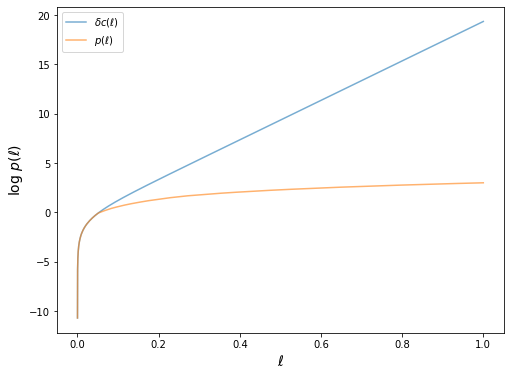

length=3
number of suppliers =[7, 5]
ell-hat= 0.05068502111689084
ell-hat= 0.05068502111689084
length=3
number of suppliers =[7, 5]
length=3
number of suppliers =[7, 5]


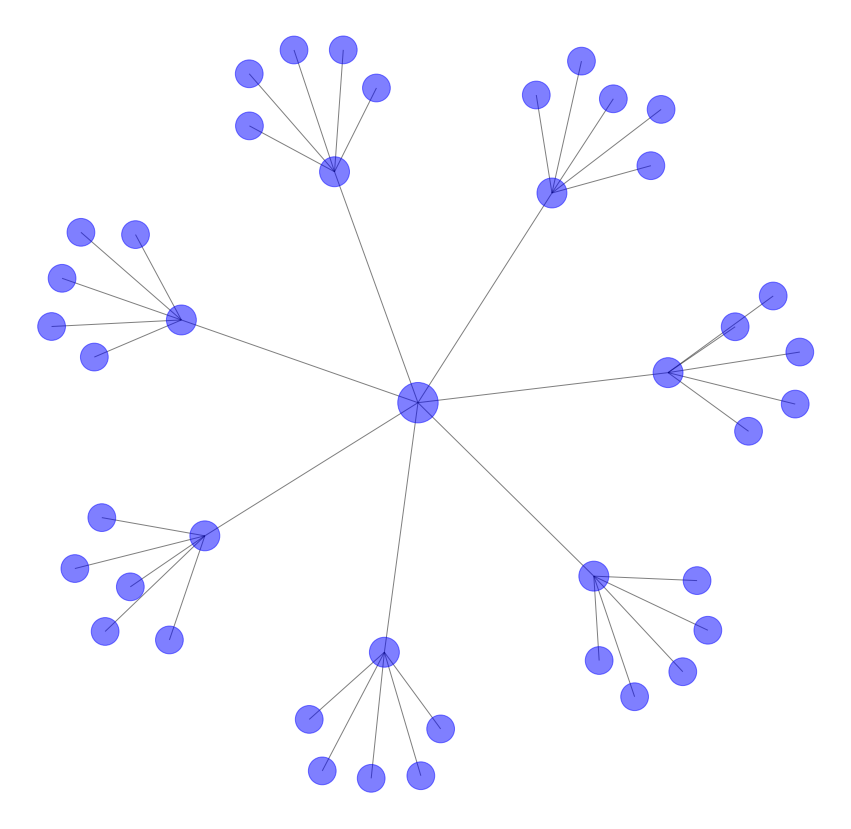

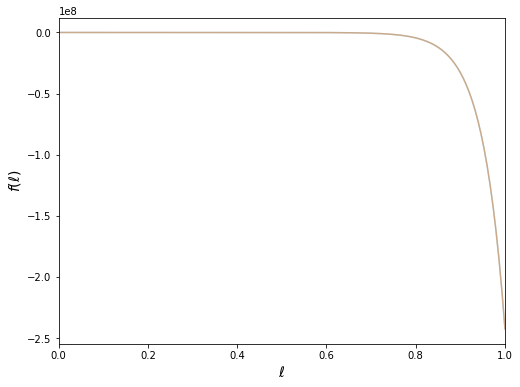

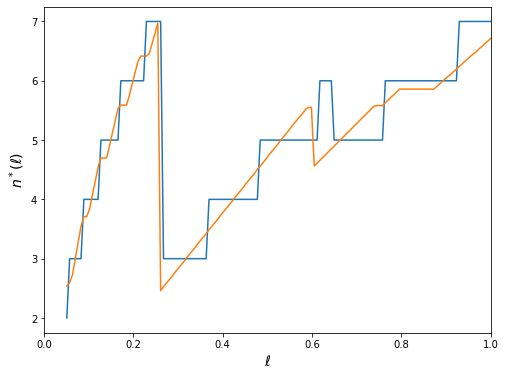

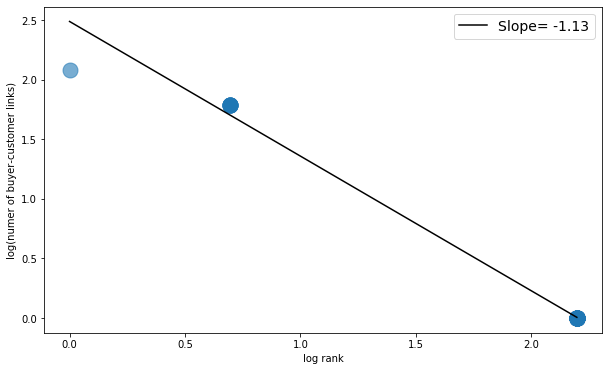

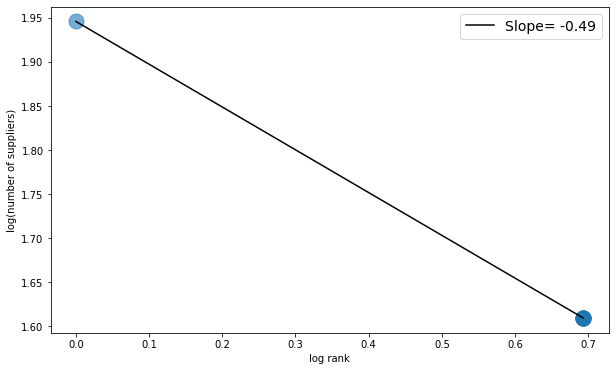

In [4]:
pc = Chain_n(τ=0.05, α=lambda ell, n: 0.1 * np.exp(0.3*n), 
             c=lambda ell: 0.5*(np.exp(20*ell) - 1))
print(pc.level())
pc.plot_prices(ylim=False, log=True)
pc.level()
draw_graph(pc, scale_factor=2000)
ell_hat(pc)
ns = n_star(pc)
zipf_with_regression(pc, plot='link')
zipf_with_regression(pc, plot='suppliers')

(3, [8, 20])


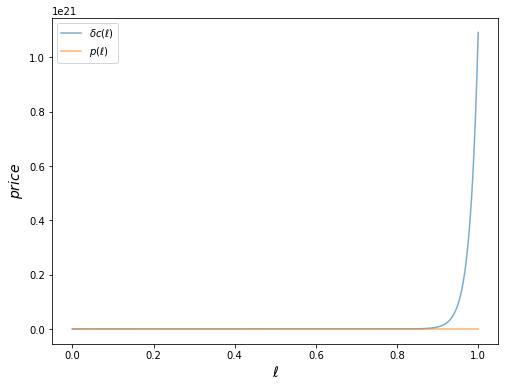

length=3
number of suppliers =[8, 20]
ell-hat= 0.021181379686824296
ell-hat= 0.021181379686824296
length=3
number of suppliers =[8, 20]
length=3
number of suppliers =[8, 20]


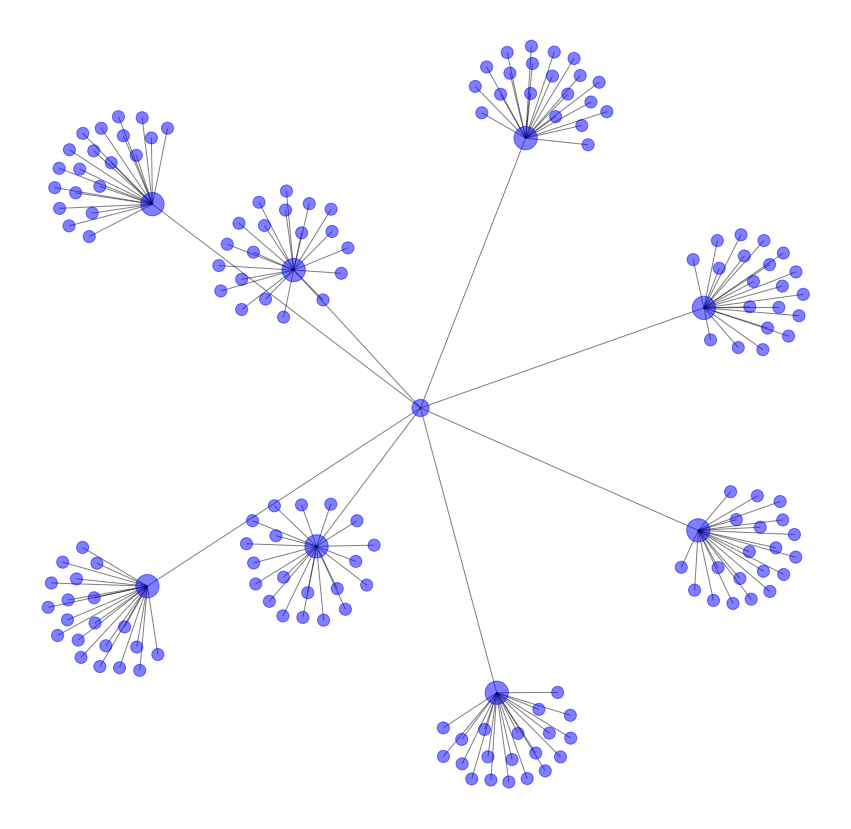

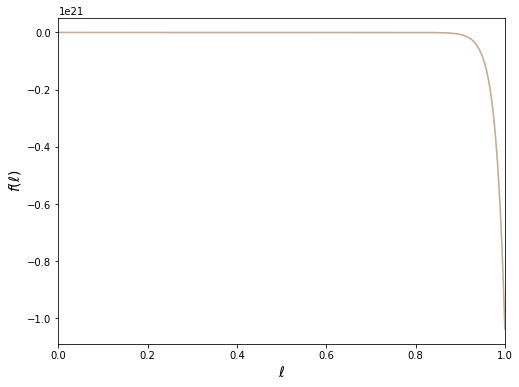

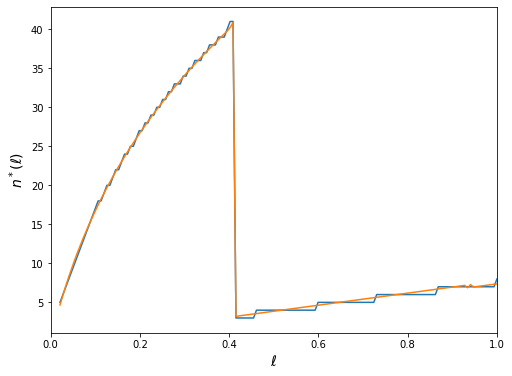

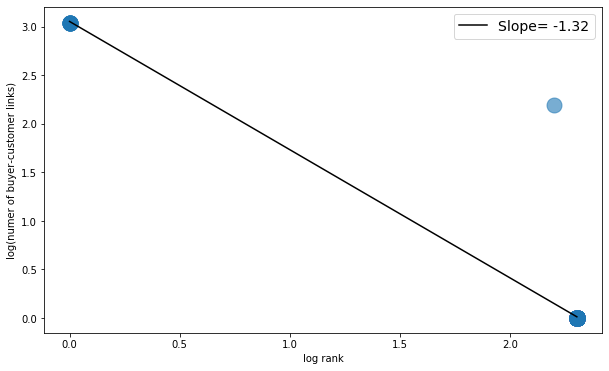

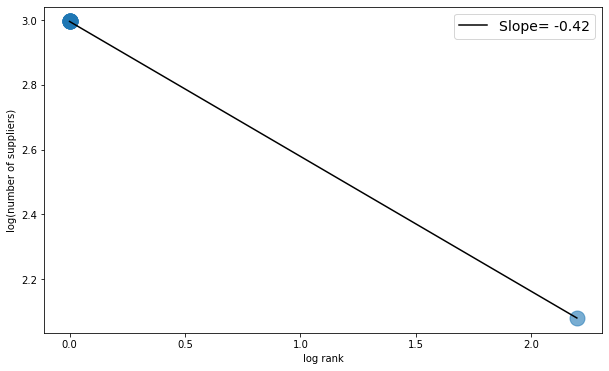

In [146]:
pc = Chain_n(τ=0.05, α=lambda ell, n: 0.1 * np.exp(0.05*n), 
             c=lambda ell: 0.2*(np.exp(50*ell) - 1))
print(pc.level())
pc.plot_prices(ylim=False)
pc.level()
draw_graph(pc, scale_factor=2000)
ell_hat(pc)
ns = n_star(pc)
zipf_with_regression(pc, plot='link')
zipf_with_regression(pc, plot='suppliers')

(2, [4])


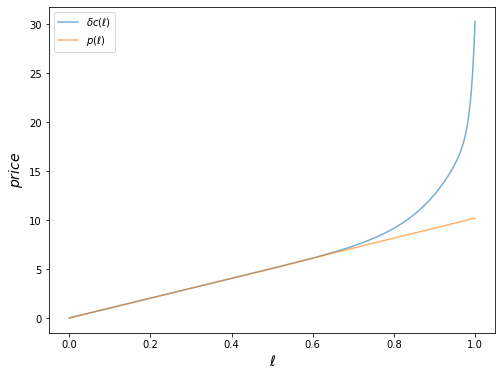

In [19]:
pc = Chain_n(τ=0.01,
             α=lambda ell, n: 0.0001*n**(1),
             c=lambda ell: 10*(ell + ell**10+ ell**100))
print(pc.level())
pc.plot_prices()
# ns = n_star(pc)

(3, [4, 5])


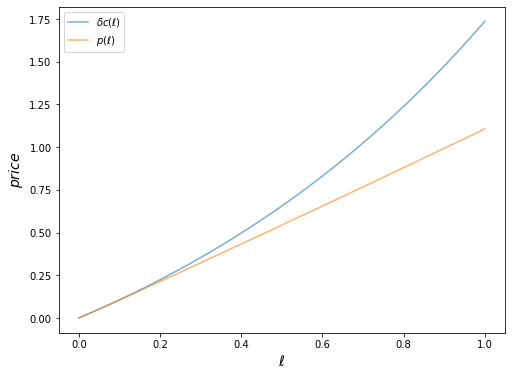

In [30]:
# pc = Chain_n(α=lambda ell, n: 0.005 *ell**1.1*n**1.1)
print(pc.level())
pc.plot_prices()
# draw_graph(pc, scale_factor=4001)

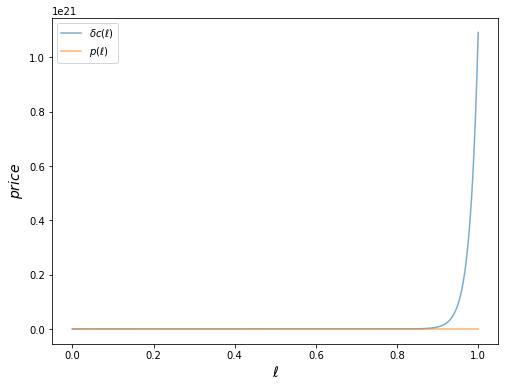

/home/chien/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


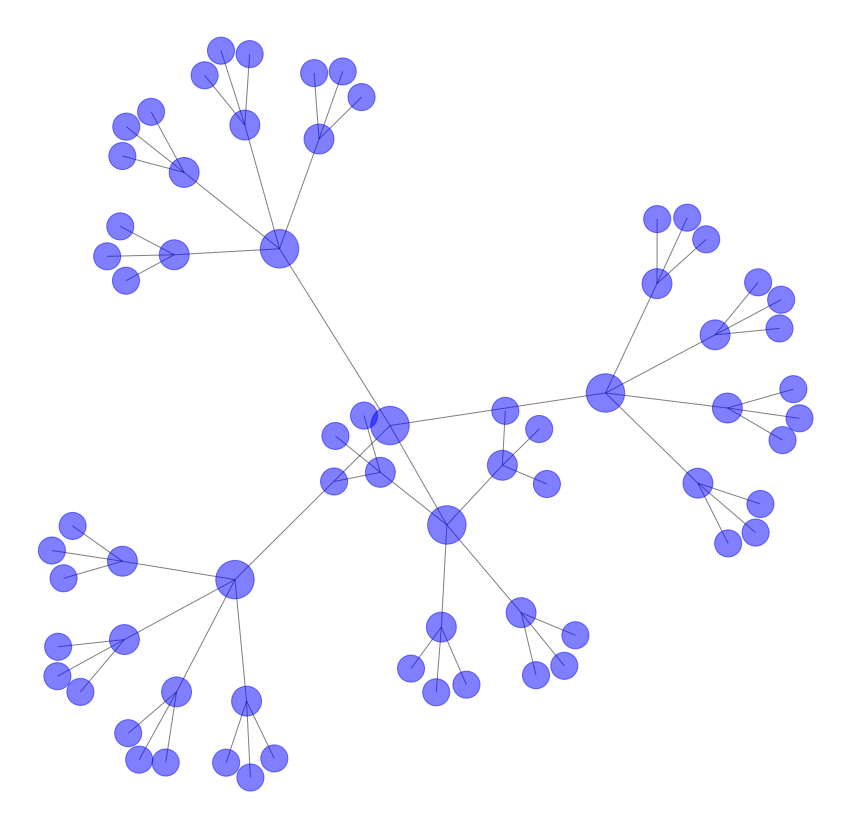

In [20]:
pc = Chain_n(τ=0.05, α=lambda ell, n: 0.1 * np.exp(0.5*n), 
             c=lambda ell: 0.2*(np.exp(50*ell) - 1))
pc.plot_prices(ylim=False)
pc.level()
draw_graph(pc, scale_factor=2000)
# ell_hat(pc)
# ns = n_star(pc)
# zipf_with_regression(pc, plot='link')
# zipf_with_regression(pc, plot='suppliers')

/home/chien/Dropbox/Research/production_chain/production_network/price_choice_over_n.py:124: RuntimeWarning: divide by zero encountered in log
  plt.plot(self.grid, np.log(self._δ * self._c(self.grid)), plottype, label=cost_label, alpha=0.6)
/home/chien/Dropbox/Research/production_chain/production_network/price_choice_over_n.py:125: RuntimeWarning: divide by zero encountered in log
  plt.plot(self.grid, np.log(self.p), plottype, label=label, alpha=0.6)


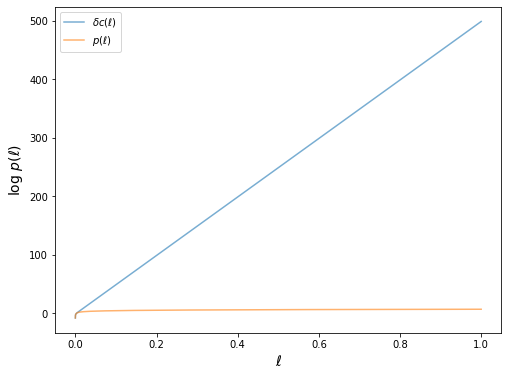

cost(1)= 2.807184435705675e+216
price(1)= 678.6342229649042


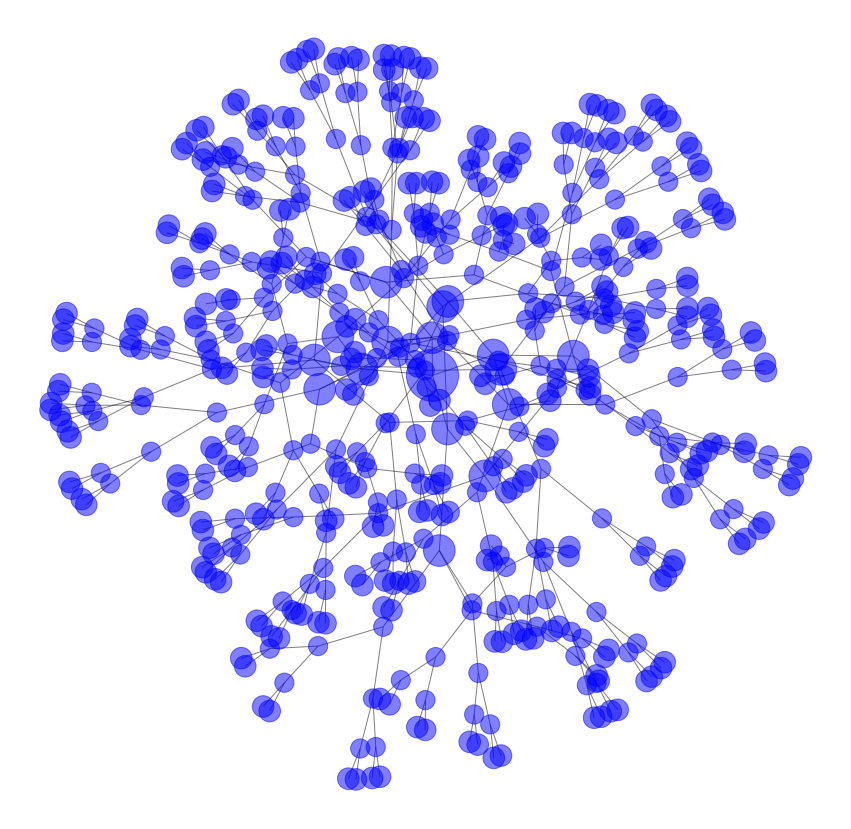

In [21]:
pc = Chain_n(τ=0.05, α=lambda ell, n: 0.1 * np.exp(1*n), 
             c=lambda ell: 0.2*(np.exp(500*ell) - 1))
pc.plot_prices(ylim=False, log=True)
pc.level()
draw_graph(pc, scale_factor=500)
print("cost(1)=", pc.c(1))
print("price(1)=", pc.p_func(1))

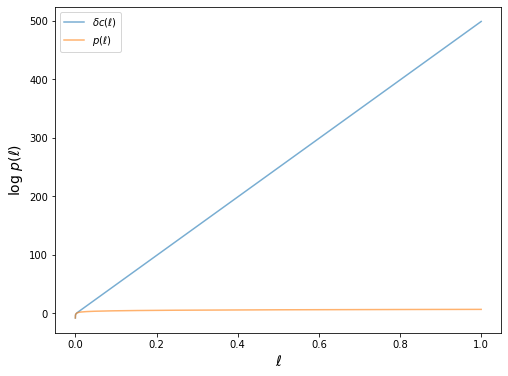

length=6
number of suppliers =[5, 4, 3, 3, 2]
cost(1)= 2.807184435705675e+216
price(1)= 536.9688269869781


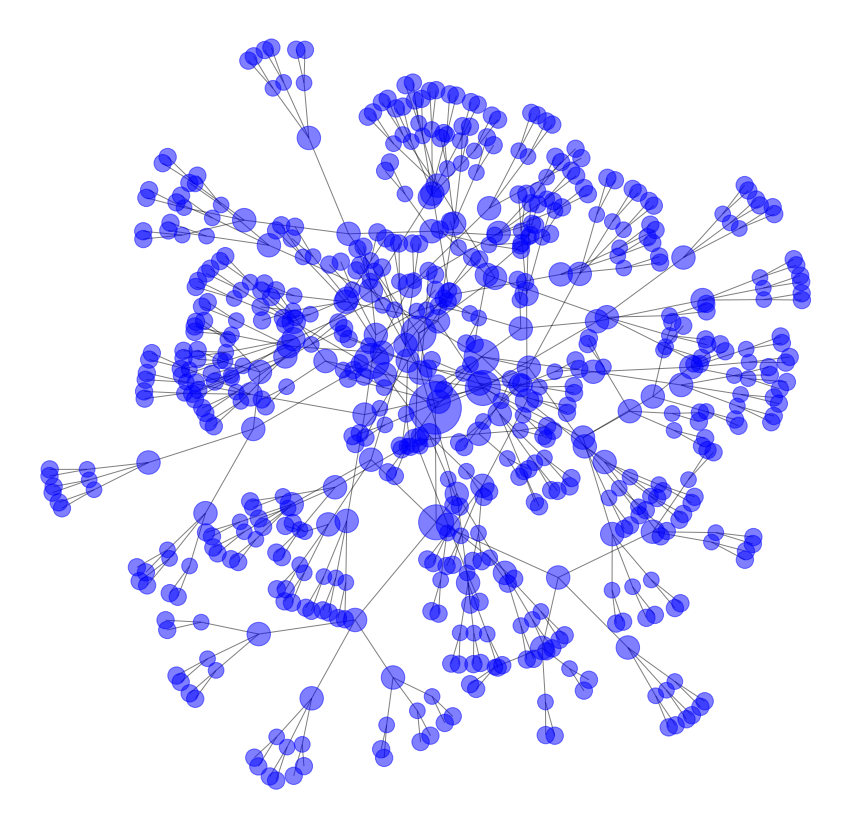

In [10]:
pc = Chain_n(τ=0.05, α=lambda ell, n: 0.1 * np.exp(0.8*n), 
             c=lambda ell: 0.2*(np.exp(500*ell) - 1))
pc.plot_prices(ylim=False, log=True)
pc.level()
draw_graph(pc, scale_factor=500)
print("cost(1)=", pc.c(1))
print("price(1)=", pc.p_func(1))

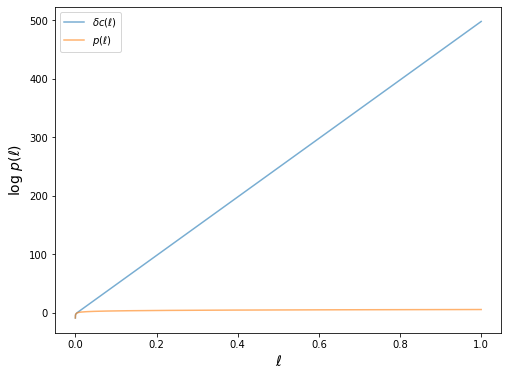

length=6
number of suppliers =[5, 3, 3, 3, 3]
cost(1)= 1.4035922178528375e+216
price(1)= 200.41142528517463


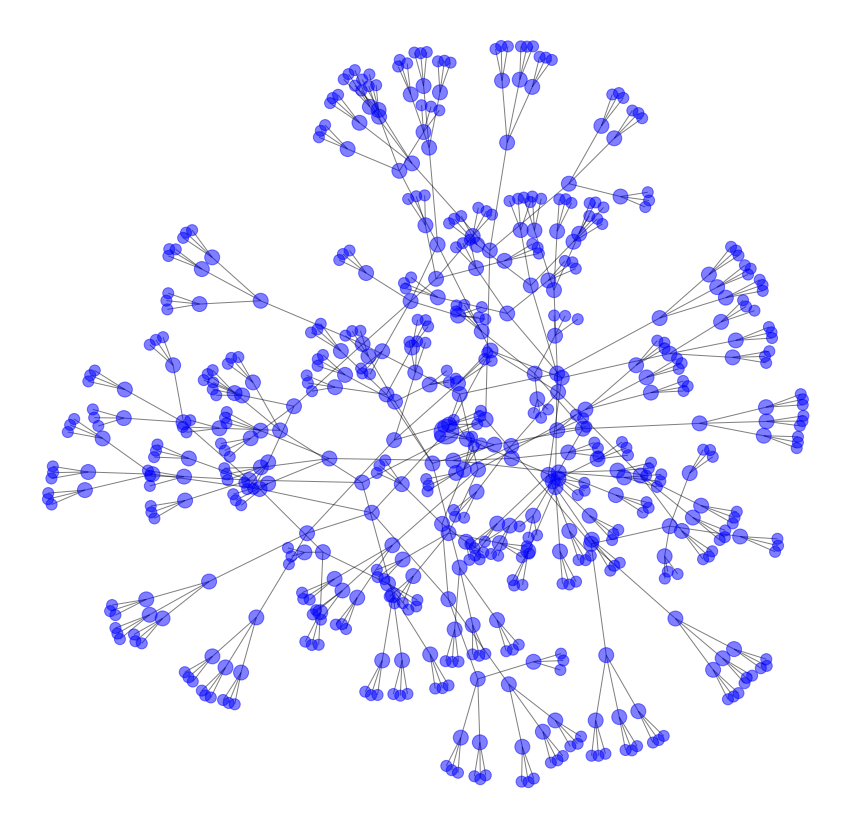

In [48]:
pc = Chain_n(τ=0.01, α=lambda ell, n: 0.1 * np.exp(0.5*n), 
             c=lambda ell: 0.1*(np.exp(500*ell) - 1))
pc.plot_prices(ylim=False, log=True)
pc.level()
draw_graph(pc, scale_factor=500)
print("cost(1)=", pc.c(1))
print("price(1)=", pc.p_func(1))